# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import urllib
from citipy import citipy
from scipy import stats

## Generate Cities List

In [31]:
output_data_file = "output_data/cities.csv"

In [16]:
# empty list to begin with
lat_lngs = []
cities = []

In [17]:
# picking random set of coordinates
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [18]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

In [20]:
from api_keys import weather_api_key
api_key = weather_api_key

In [21]:
# starting url for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [22]:
# create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [23]:
# start call counter
record = 1

In [24]:
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=husavik
Processing Record 2 | Karasburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=karasburg
Processing Record 3 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=atuona
Processing Record 4 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=castro
Processing Record 5 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=kapaa
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=46968aa5427fa1c6f79e3d9d66ab83b6&q=punta%20arenas
Processing Record 7 | Lata
http://api.openweathermap.org/data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# create a dictionary from the lists above
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [26]:
# convert to a dataframe
weather_data = pd.DataFrame(weatherpy_dict)

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Husavik,32,IS,1625807456,76,66.0449,-17.3389,54.81,2.51
1,Karasburg,80,NA,1625807458,71,-28.0167,18.7500,45.32,4.63
2,Atuona,7,PF,1625807460,74,-9.8000,-139.0333,78.55,18.95
3,Castro,0,BR,1625807462,92,-24.7911,-50.0119,45.84,3.76
4,Kapaa,40,US,1625807464,78,22.0752,-159.3190,80.92,3.00


In [27]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,581.000000,5.810000e+02,581.000000,581.000000,581.000000,581.000000,581.000000
mean,52.781411,1.625808e+09,69.979346,20.104904,20.690184,69.662599,8.206850
std,38.993130,3.328368e+02,21.481337,33.213740,89.946905,13.986305,5.947524
min,0.000000,1.625807e+09,8.000000,-54.800000,-179.166700,33.820000,0.000000
25%,10.000000,1.625808e+09,57.000000,-6.466700,-57.882500,60.390000,3.740000
50%,59.000000,1.625808e+09,74.000000,22.075200,27.700300,72.160000,6.910000
75%,92.000000,1.625808e+09,88.000000,48.972300,98.517400,80.080000,11.500000
max,100.000000,1.625809e+09,100.000000,78.218600,179.316700,100.350000,31.880000


In [32]:
# save dataframe to CSV
weather_data.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
weather_data[weather_data.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

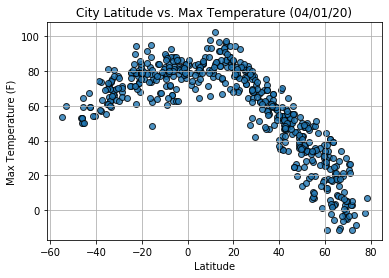

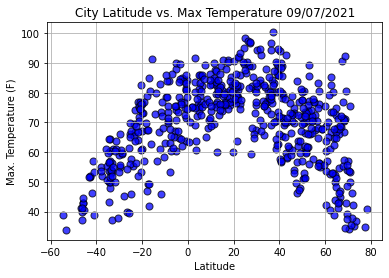

In [48]:
# scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Max Temp"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

plt.title("City Latitude vs. Max Temperature 09/07/2021")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig1.png')


interpretation of the chart above:
The equator is the line of 0 degrees latitude. From the plot above, the maximum temperature decreases (becomes colder or lower) as the degrees latitude went further from the equator.

## Latitude vs. Humidity Plot

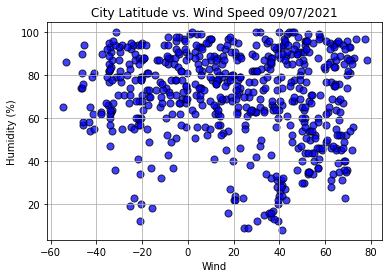

In [49]:
# scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

plt.title("City Latitude vs. Wind Speed 09/07/2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Wind")
plt.grid(True)

plt.savefig('output_data/Fig2.png')

interpretation of the chart above: Generally, warm air hold more moisture than cool air, so countries closer to the equator generally have higher humidity. However, from the plot above, it's difficult to eyeball!

## Latitude vs. Cloudiness Plot

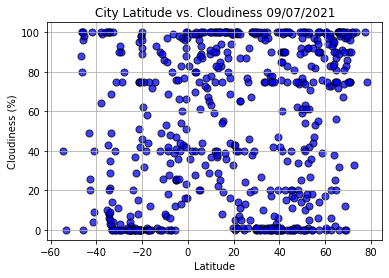

In [50]:
# scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

plt.title("City Latitude vs. Cloudiness 09/07/2021")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig3.png')

interpretation of the chart above: Cloudiness more on 40-60 deg latitude...

## Latitude vs. Wind Speed Plot

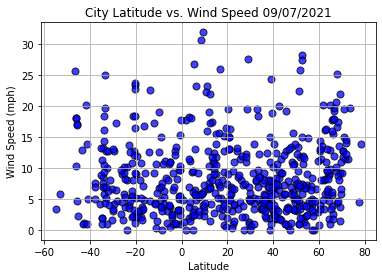

In [51]:
# scatter plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

plt.title("City Latitude vs. Wind Speed 09/07/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig4.png')

iterpretation: wind speed doesn't seem to have a relationship with degrees latitude.

## Linear Regression

In [52]:
north = weather_data.loc[(weather_data["Lat"] >= 0)]
south = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      61.874411
4      78.496323
6      71.658611
8      61.259581
10     59.325763
         ...    
573    75.614139
576    67.205783
578    73.994767
579    70.534422
580    65.418074
Name: Lat, Length: 400, dtype: float64
The r-value is: 0.324290346771122


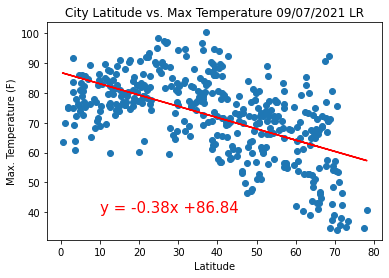

In [62]:
# Create Plot

x_values = north["Lat"]
y_values = north["Max Temp"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Max Temp, Northern Hemisphere 09/07/2021")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()


interpretation: max temp trends low as degrees latitude gets further away from 0, the equator.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

1      58.788798
2      72.076157
3      61.141568
5      40.456433
7      70.439955
         ...    
568    57.445816
570    78.893471
574    60.359718
575    72.180681
577    45.768911
Name: Lat, Length: 181, dtype: float64
The r-value is: 0.5401805234370576


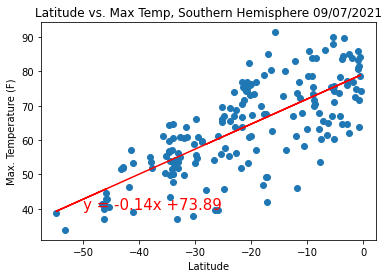

In [68]:
x_values = south["Lat"]
y_values = south["Max Temp"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Max Temp, Southern Hemisphere 09/07/2021")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()


max temp increases as the location of the city gets closer to the equator at 0 deg latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      64.603581
4      70.785940
6      68.242719
8      64.374901
10     63.655636
         ...    
573    69.713939
576    66.586533
578    69.111630
579    67.824588
580    65.921612
Name: Lat, Length: 400, dtype: float64
The r-value is: 0.015633879853035396


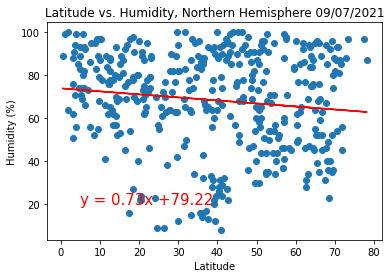

In [69]:
x_values = north["Lat"]
y_values = north["Humidity"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Humidity, Northern Hemisphere 09/07/2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(5,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

interpretation: not s huge difference in humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      72.962990
2      73.946692
3      73.137172
5      71.605790
7      73.825559
         ...    
568    72.863565
570    74.451398
574    73.079289
575    73.954430
577    71.999089
Name: Lat, Length: 181, dtype: float64
The r-value is: 0.001715487452489887


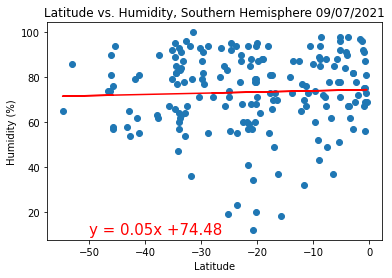

In [71]:
x_values = south["Lat"]
y_values = south["Humidity"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Humidity, Southern Hemisphere 09/07/2021")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

interpretation: humidity is not a function of the latitude, almost no relationship at all

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      58.897053
4      57.368802
6      57.997475
8      58.953582
10     59.131381
         ...    
573    57.633796
576    58.406877
578    57.782684
579    58.100835
580    58.571242
Name: Lat, Length: 400, dtype: float64
The r-value is: 0.00033682059213115893


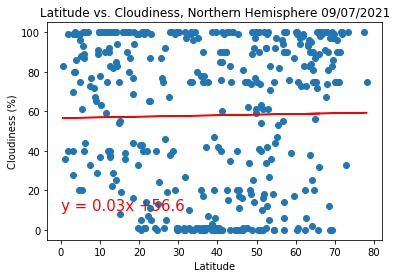

In [73]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Cloudiness, Northern Hemisphere 09/07/2021")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      40.343069
2      42.966852
3      40.807658
5      36.723076
7      42.643760
         ...    
568    40.077878
570    44.313030
574    40.653270
575    42.987492
577    37.772102
Name: Lat, Length: 181, dtype: float64
The r-value is: 0.0026586238004950137


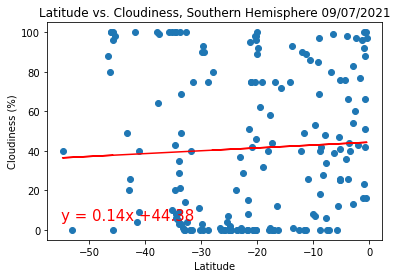

In [75]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Cloudiness, Southern Hemisphere 09/07/2021")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

interpretation: cloudiness is not a function of the latitude, almost no relationship at all

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      8.711173
4      8.095054
6      8.348505
8      8.733962
10     8.805643
         ...   
573    8.201887
576    8.513557
578    8.261912
579    8.390175
580    8.579821
Name: Lat, Length: 400, dtype: float64
The r-value is: 0.0022344295732930927


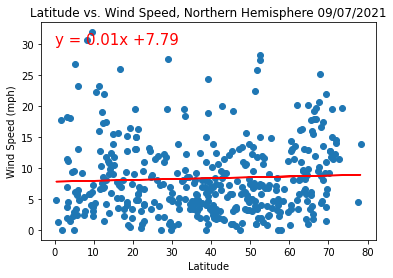

In [81]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Wind Speed, Northern Hemisphere 09/07/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1       8.468556
2       7.119737
3       8.229723
5      10.329501
7       7.285831
         ...    
568     8.604884
570     6.427702
574     8.309090
575     7.109127
577     9.790224
Name: Lat, Length: 181, dtype: float64
The r-value is: 0.029976659666641432


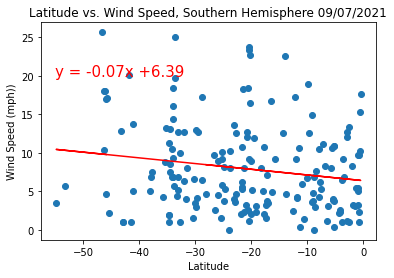

In [83]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.title("Latitude vs. Wind Speed, Southern Hemisphere 09/07/2021")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.show()

no relationship between wind speed and latitude